In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False


In [37]:
df = pd.read_csv('dataset\Raw_data_1Hr_2015_2024_Mandir_Marg_Delhi_DPCC.csv')

In [38]:
df.head()

Timestamp  PM2.5  PM10  NO  NO2  NH3  SO2  CO  Ozone  AT  RH  WS  WD  \
0  01-01-2015 0.00    NaN   NaN NaN  NaN  NaN  NaN NaN    NaN NaN NaN NaN NaN   
1  01-01-2015 1.00    NaN   NaN NaN  NaN  NaN  NaN NaN    NaN NaN NaN NaN NaN   
2  01-01-2015 2.00    NaN   NaN NaN  NaN  NaN  NaN NaN    NaN NaN NaN NaN NaN   
3  01-01-2015 3.00    NaN   NaN NaN  NaN  NaN  NaN NaN    NaN NaN NaN NaN NaN   
4  01-01-2015 4.00    NaN   NaN NaN  NaN  NaN  NaN NaN    NaN NaN NaN NaN NaN   

   SR  BP  
0 NaN NaN  
1 NaN NaN  
2 NaN NaN  
3 NaN NaN  
4 NaN NaN

In [39]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%d-%m-%Y %H.%M") #datetime setup

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87672 entries, 0 to 87671
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  87672 non-null  datetime64[ns]
 1   PM2.5      76973 non-null  float64       
 2   PM10       77234 non-null  float64       
 3   NO         75595 non-null  float64       
 4   NO2        76555 non-null  float64       
 5   NH3        75934 non-null  float64       
 6   SO2        74546 non-null  float64       
 7   CO         75144 non-null  float64       
 8   Ozone      75821 non-null  float64       
 9   AT         77414 non-null  float64       
 10  RH         77508 non-null  float64       
 11  WS         78462 non-null  float64       
 12  WD         77639 non-null  float64       
 13  SR         78021 non-null  float64       
 14  BP         78037 non-null  float64       
dtypes: datetime64[ns](1), float64(14)
memory usage: 10.0 MB


In [41]:
df.head()

Timestamp  PM2.5  PM10  NO  NO2  NH3  SO2  CO  Ozone  AT  RH  WS  \
0 2015-01-01 00:00:00    NaN   NaN NaN  NaN  NaN  NaN NaN    NaN NaN NaN NaN   
1 2015-01-01 01:00:00    NaN   NaN NaN  NaN  NaN  NaN NaN    NaN NaN NaN NaN   
2 2015-01-01 02:00:00    NaN   NaN NaN  NaN  NaN  NaN NaN    NaN NaN NaN NaN   
3 2015-01-01 03:00:00    NaN   NaN NaN  NaN  NaN  NaN NaN    NaN NaN NaN NaN   
4 2015-01-01 04:00:00    NaN   NaN NaN  NaN  NaN  NaN NaN    NaN NaN NaN NaN   

   WD  SR  BP  
0 NaN NaN NaN  
1 NaN NaN NaN  
2 NaN NaN NaN  
3 NaN NaN NaN  
4 NaN NaN NaN

In [42]:
fig = px.line(df, x='Timestamp', y='PM2.5', title='PM2.5 trend')

fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='3y', step='year', stepmode='backward'),
            dict(count=3, label='5y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

In [43]:
ny_df=df.set_index('Timestamp')

array([<Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>],
      dtype=object)

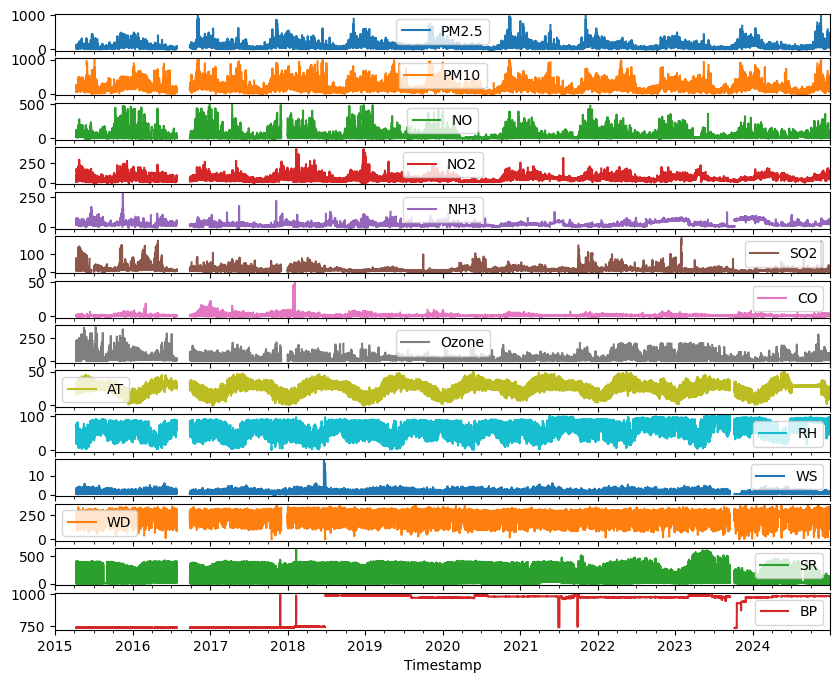

In [44]:
ny_df.plot(subplots=True)

In [45]:
ny_df = ny_df.resample('D').mean()

array([<Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>],
      dtype=object)

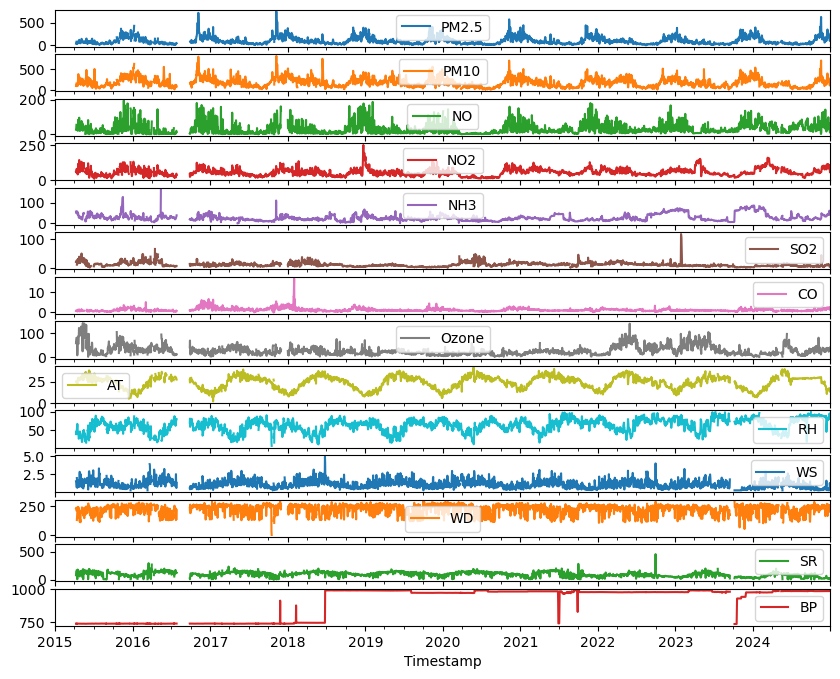

In [46]:
ny_df.plot(subplots=True)

### Prophet model

In [47]:

from prophet import Prophet

In [48]:
ny_df = ny_df.reset_index()[['Timestamp', 'PM2.5']].rename({'Timestamp':'ds','PM2.5':'y'}, axis='columns')

In [14]:
ny_df

ds           y
0    2015-01-01         NaN
1    2015-01-02         NaN
2    2015-01-03         NaN
3    2015-01-04         NaN
4    2015-01-05         NaN
...         ...         ...
3648 2024-12-27  152.954545
3649 2024-12-28  104.933333
3650 2024-12-29   98.541667
3651 2024-12-30   95.863636
3652 2024-12-31  156.083333

[3653 rows x 2 columns]

<Axes: >

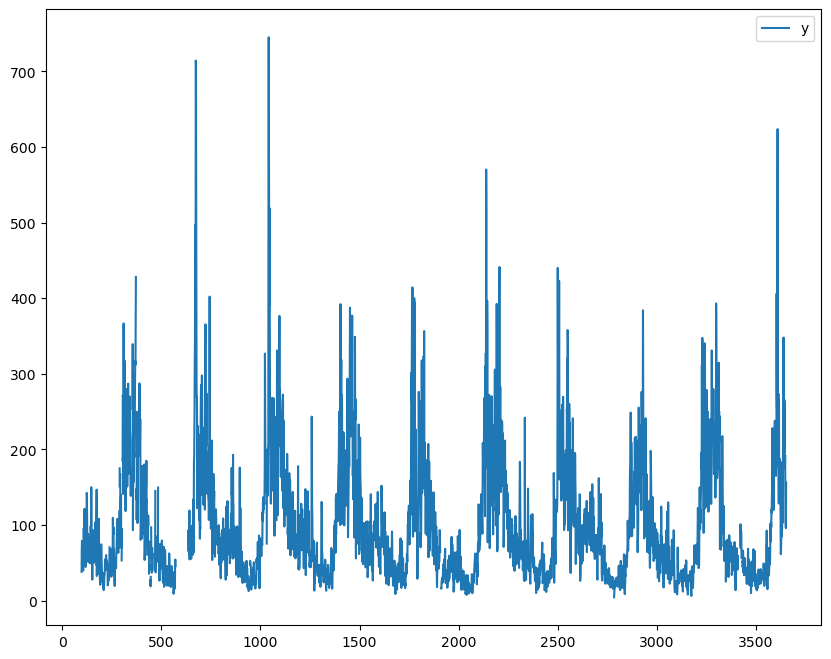

In [55]:
ny_df[['y']].plot()

In [15]:
train = ny_df[(ny_df['ds'] >= '2015-01-01')&(ny_df['ds']<= '2023-12-31')]
test = ny_df[(ny_df['ds']>'2023-12-31')]

In [16]:
train.shape

(3287, 2)

In [17]:
test.shape

(366, 2)

In [18]:
test

ds           y
3287 2024-01-01  177.757083
3288 2024-01-02  167.170000
3289 2024-01-03  181.753750
3290 2024-01-04  219.968750
3291 2024-01-05  174.920000
...         ...         ...
3648 2024-12-27  152.954545
3649 2024-12-28  104.933333
3650 2024-12-29   98.541667
3651 2024-12-30   95.863636
3652 2024-12-31  156.083333

[366 rows x 2 columns]

In [ ]:
m = Prophet(interval_width=0.8,yearly_seasonality=True)

In [56]:
m.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [20]:
m.fit(train)

16:14:01 - cmdstanpy - INFO - Chain [1] start processing
16:14:03 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
m.params

OrderedDict([('lp__', array([[6832.93]])),
             ('k', array([[0.00852304]])),
             ('m', array([[0.138574]])),
             ('delta',
              array([[-8.04468e-08,  3.34545e-07, -3.35954e-08,  4.82083e-02,
                       1.85882e-05,  1.09063e-06, -4.66597e-08, -3.06890e-07,
                      -9.62079e-02, -6.85641e-02, -2.71745e-05, -4.35663e-05,
                      -2.86882e-03, -9.26717e-07, -4.10499e-08,  3.22690e-07,
                       1.24691e-01,  3.09685e-02,  1.04917e-07, -5.23969e-03,
                      -8.23812e-02, -6.01508e-07,  2.60506e-07,  1.52338e-07,
                       2.17495e-07]])),
             ('sigma_obs', array([[0.0651047]])),
             ('beta',
              array([[-1.26101e-02,  9.92909e-02, -4.57596e-02,  3.12259e-02,
                      -6.51561e-03, -3.49533e-03,  1.28988e-02, -1.06979e-02,
                       1.63239e-02,  5.92698e-03,  5.59570e-03,  1.76127e-02,
                      -2.54340e-03, 

In [60]:
# creating future dates fo 365 days
future = m.make_future_dataframe(periods=366)
future.tail()

ds
3648 2024-12-27
3649 2024-12-28
3650 2024-12-29
3651 2024-12-30
3652 2024-12-31

In [59]:
forecast = m.predict(future)
# forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()
forecast.head()



ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2015-01-01  103.051084  161.371063  283.368369   103.051084   103.051084   
1 2015-01-02  103.053076  153.428734  273.691329   103.053076   103.053076   
2 2015-01-03  103.055068  146.869940  279.657587   103.055068   103.055068   
3 2015-01-04  103.057060  148.204204  271.630073   103.057060   103.057060   
4 2015-01-05  103.059052  144.216190  264.233066   103.059052   103.059052   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0      116.174865            116.174865            116.174865  2.321104   
1      113.965036            113.965036            113.965036  1.795428   
2      109.780383            109.780383            109.780383 -0.490322   
3      106.771360            106.771360            106.771360 -1.415039   
4      103.707541            103.707541            103.707541 -2.237449   

   weekly_lower  weekly_upper      yearly  yearly_lower  yearly_upper  \
0      2.321104      2.321104  113.853761    113.853761    113.853761   
1      1.795428      1.795428  112.169607    112.169607    112.169607   
2     -0.490322     -0.490322  110.270705    110.270705    110.270705   
3     -1.415039     -1.415039  108.186399    108.186399    108.186399   
4     -2.237449     -2.237449  105.944990    105.944990    105.944990   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper        yhat  
0                         0.0  219.225949  
1                         0.0  217.018112  
2                         0.0  212.835451  
3                         0.0  209.828419  
4                         0.0  206.766593

<Axes: xlabel='ds'>

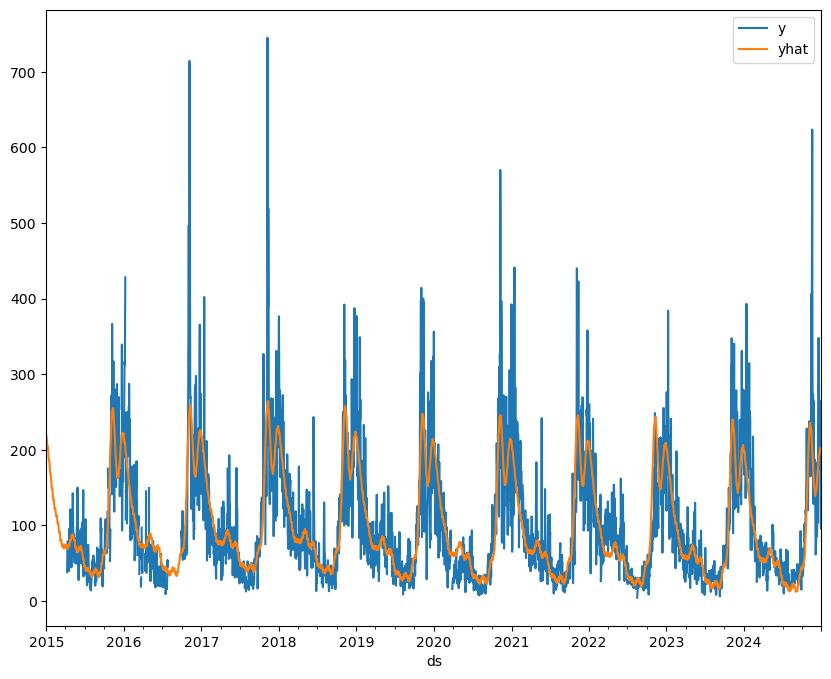

In [24]:
pd.concat([ny_df.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

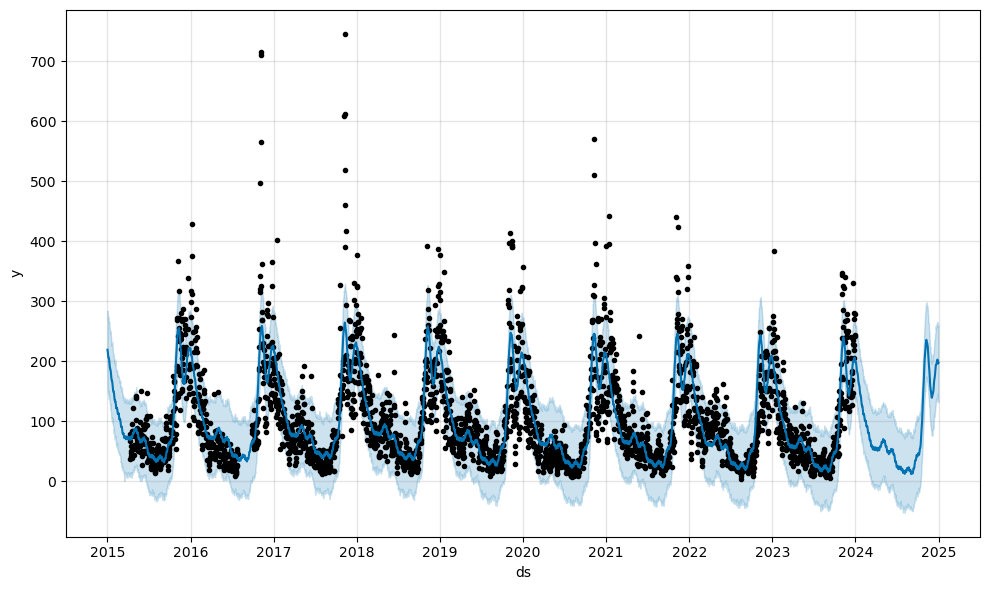

In [25]:
fig1 = m.plot(forecast)

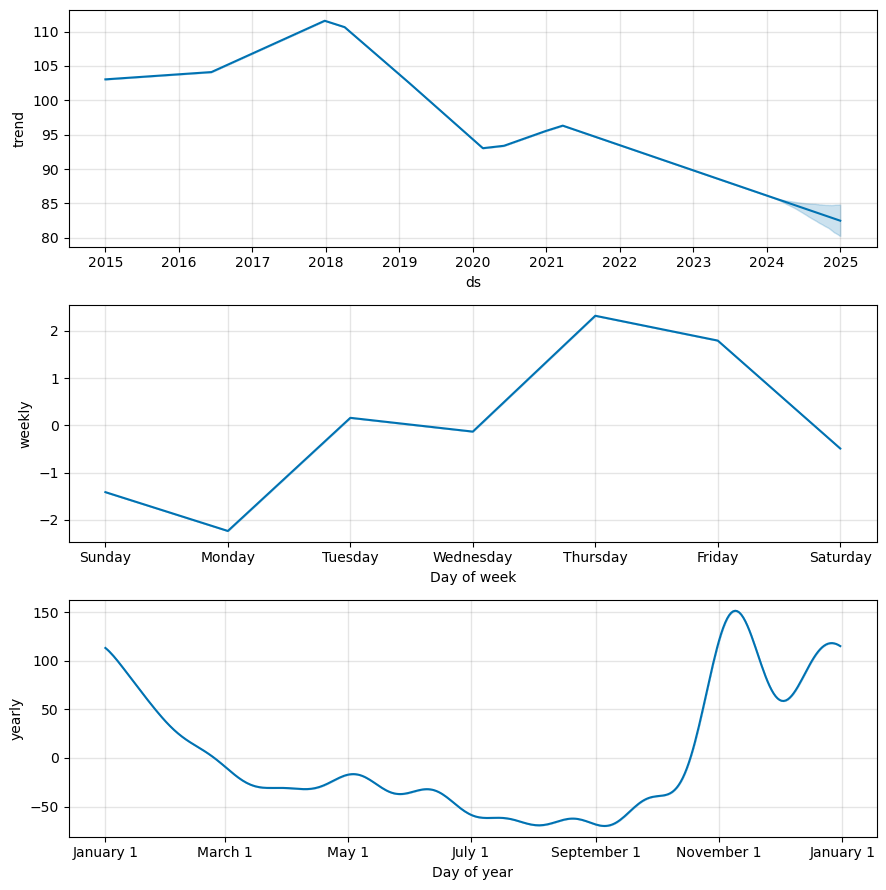

In [26]:
fig2 = m.plot_components(forecast)

In [27]:
from prophet.plot import plot_plotly
import plotly.offline as py

fig = plot_plotly(m, forecast) #this returns a plotly figure
py.iplot(fig)

In [61]:
#cross validation
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, horizon='365 days', period='180 days', initial='1095 days')

  0%|          | 0/10 [00:00<?, ?it/s]

18:32:28 - cmdstanpy - INFO - Chain [1] start processing
18:32:29 - cmdstanpy - INFO - Chain [1] done processing
18:32:30 - cmdstanpy - INFO - Chain [1] start processing
18:32:30 - cmdstanpy - INFO - Chain [1] done processing
18:32:31 - cmdstanpy - INFO - Chain [1] start processing
18:32:31 - cmdstanpy - INFO - Chain [1] done processing
18:32:32 - cmdstanpy - INFO - Chain [1] start processing
18:32:32 - cmdstanpy - INFO - Chain [1] done processing
18:32:33 - cmdstanpy - INFO - Chain [1] start processing
18:32:33 - cmdstanpy - INFO - Chain [1] done processing
18:32:34 - cmdstanpy - INFO - Chain [1] start processing
18:32:34 - cmdstanpy - INFO - Chain [1] done processing
18:32:35 - cmdstanpy - INFO - Chain [1] start processing
18:32:35 - cmdstanpy - INFO - Chain [1] done processing
18:32:36 - cmdstanpy - INFO - Chain [1] start processing
18:32:36 - cmdstanpy - INFO - Chain [1] done processing
18:32:37 - cmdstanpy - INFO - Chain [1] start processing
18:32:37 - cmdstanpy - INFO - Chain [1]

In [63]:
df_cv.shape

(3629, 6)

In [65]:
df_cv.head()

ds       yhat  yhat_lower  yhat_upper          y     cutoff
0 2018-07-26  44.837156  -21.903430  116.728282  26.159583 2018-07-25
1 2018-07-27  45.742531  -19.600242  111.465161  18.347500 2018-07-25
2 2018-07-28  47.550770  -19.766503  116.188085  32.912917 2018-07-25
3 2018-07-29  41.150435  -27.258658  109.161713  42.684167 2018-07-25
4 2018-07-30  39.058412  -28.988178  102.577107  36.322917 2018-07-25

In [72]:
#performance matric
from prophet.diagnostics import performance_metrics
df_performance = performance_metrics(df_cv)
df_performance.head()



horizon          mse       rmse        mae      mape     mdape     smape  \
0 37 days  2293.561255  47.891140  32.082752  0.494441  0.350727  0.428617   
1 38 days  2215.280817  47.066770  31.409975  0.487335  0.346620  0.424599   
2 39 days  2123.062856  46.076706  30.628186  0.479435  0.343129  0.420545   
3 40 days  1955.174584  44.217356  29.705175  0.468601  0.341327  0.416064   
4 41 days  1698.892115  41.217619  28.614202  0.461310  0.341327  0.412564   

   coverage  
0  0.870442  
1  0.874033  
2  0.879558  
3  0.883425  
4  0.891713

In [68]:
df_performance

horizon          mse       rmse        mae      mape     mdape     smape  \
0    37 days  2293.561255  47.891140  32.082752  0.494441  0.350727  0.428617   
1    38 days  2215.280817  47.066770  31.409975  0.487335  0.346620  0.424599   
2    39 days  2123.062856  46.076706  30.628186  0.479435  0.343129  0.420545   
3    40 days  1955.174584  44.217356  29.705175  0.468601  0.341327  0.416064   
4    41 days  1698.892115  41.217619  28.614202  0.461310  0.341327  0.412564   
..       ...          ...        ...        ...       ...       ...       ...   
324 361 days  3152.300072  56.145348  43.978457  0.607475  0.393167  0.500153   
325 362 days  3066.217529  55.373437  43.438113  0.615816  0.395199  0.502356   
326 363 days  3047.218023  55.201613  43.365718  0.624683  0.397063  0.506669   
327 364 days  3195.565881  56.529336  43.935791  0.633793  0.397880  0.512496   
328 365 days  3342.752356  57.816541  44.228151  0.637730  0.398694  0.516612   

     coverage  
0    0.870442  
1    0.874033  
2    0.879558  
3    0.883425  
4    0.891713  
..        ...  
324  0.768508  
325  0.776243  
326  0.780110  
327  0.777901  
328  0.777348  

[329 rows x 8 columns]

C:\Users\PushpRaj\AppData\Roaming\Python\Python313\site-packages\prophet\plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

C:\Users\PushpRaj\AppData\Roaming\Python\Python313\site-packages\prophet\plot.py:548: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



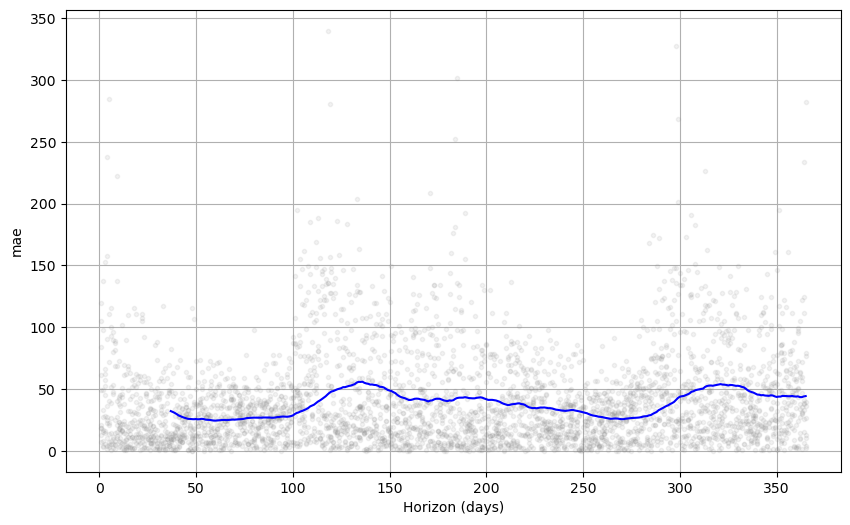

In [73]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')